# Importing Required Modules

## General Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


## Modelling

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

## My modules

In [3]:
from my_modules.Predict import classification

# Functions

In [100]:
def text_classification(x, y, vect_model, pred_model, test_size=0.2, random_state=0):

    # Train/Test Split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state, stratify=y)

    # Vectorization
    vect_model.fit(x_train)

    x_vect_train = vect_model.transform(x_train)
    x_vect_test = vect_model.transform(x_test)

    # Prediction
    output = classification(x_vect_train, y_train, x_vect_test, y_test, pred_model, **kwargs)

    return output

    

# Loading the data

In [5]:
path = "Data/financial/fin_red_data_processed.csv"
df = pd.read_csv(path)

# From Words to Numbers

In [6]:
y = df["sentiment"]
x = df["lemmas"]

lb = LabelBinarizer()
y = np.ravel(lb.fit_transform(y))


In [7]:
df

,text,lemmas,ngrams,named_ents,sentiment
0,European traffic grew nearly 30 % .,"['european', 'traffic', 'grow', 'nearly']",['european_traffic'],[],positive
1,Singapore in May 2011 1 July 2010 Finnish air ...,"['finnish', 'air', 'carrier', 'say', 'today', ...","['finnish_air', 'finnish_air_carrier', 'say_to...","['Singapore/GPE', 'Singapore/GPE']",positive
2,"Ragutis , controlled by the Finnish brewery Ol...","['control', 'finnish', 'brewery', 'achieve', '...",['finnish_brewery'],[],positive
3,Outotec 's net profit for the second quarter o...,"['net', 'profit', 'second', 'quarter', 'jump',...","['net_profit', 'second_quarter']",[],positive
4,"In addition , the production at the Varpaisj+_...","['addition', 'production', 'factory', 'stop', ...",[],[],negative
...,...,...,...,...,...
1193,Operating profit excluding non-recurring items...,"['operate', 'profit', 'exclude', 'non', 'recur...","['operate_profit', 'recurring_item', 'correspo...",[],negative
1194,Nordic banks have already had to write off siz...,"['nordic', 'bank', 'write', 'sizable', 'loan',...","['nordic_bank', 'sizable_loan', 'combine_loss'...","['Latvia/GPE', 'Latvia/GPE']",negative
1195,"Operating loss totalled EUR 4.0 mn , compared ...","['operating', 'loss', 'total', 'compare', 'pro...",['second_quarter'],[],negative
1196,Both operating profit and turnover for the six...,"['operate', 'profit', 'turnover', 'month', 'pe...","['operate_profit', 'corresponding_period']",[],positive


In [8]:
print(y)

[1 1 1 ... 0 1 0]


## Train/test Split

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100, stratify=y)

In [84]:
x_train

475     ['pct', 'eur', 'kick', 'morning', 'negative', ...
732           ['year', 'operating', 'result', 'negative']
234     ['finnish', 'electronics', 'contract', 'manufa...
738     ['combine', 'activity', 'create', 'value', 'sh...
851     ['enter', 'deal', 'subsidiary', 'supply', 'uni...
                              ...                        
944     ['close', 'pct', 'low', 'point', 'pct', '10,32...
1053    ['sale', 'increase', 'sale', 'clothing', 'stor...
269     ['kaupunkin', 'base', 'company', 'award', 'con...
1100    ['equity', 'ratio', 'compare', 'quarter', 'net...
913     ['banking', 'unchanged', 'eur', 'rise', 'pct',...
Name: lemmas, Length: 958, dtype: object

In [85]:
x_test

228      ['leakage', 'gypsum', 'pond', 'detect', 'today']
188                 ['pretax', 'loss', 'total', 'profit']
916     ['estonian', 'electronic', 'component', 'facto...
1015    ['company', 'aim', 'annual', 'saving', 'm', 'm...
237     ['company', 'say', 'sign', 'agreement', 'finni...
                              ...                        
521           ['generate', 'operating', 'loss', 'profit']
825     ['own', 'local', 'textile', 'company', 'say', ...
198         ['division', 'record', 'operating', 'profit']
1159    ['cash', 'flow', 'operation', 'grow', 'year', ...
513          ['lamp', 'light', 'introduce', 'bestseller']
Name: lemmas, Length: 240, dtype: object

In [86]:
pd.DataFrame(y_train)[0].value_counts()

1    479
0    479
Name: 0, dtype: int64

In [87]:
pd.DataFrame(y_test)[0].value_counts()

0    120
1    120
Name: 0, dtype: int64

## Vectorization - Bag of Words

In [88]:
cv = CountVectorizer()

In [89]:
cv.fit(x_train)

x_bow_train = cv.transform(x_train)
x_bow_test = cv.transform(x_test)

print(f'x_bow_train: {x_bow_train.shape}')
print(f'x_bow_test: {x_bow_test.shape}')

x_bow_train: (958, 1780)
x_bow_test: (240, 1780)


In [90]:
x_bow_train_df = pd.DataFrame(x_bow_test.toarray(), columns=cv.get_feature_names())

C:\Users\user\miniconda3\envs\DA_ENV\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Top 100 more frequent lemmas in the IMDb train corpus

In [91]:
list_tuples = []

for column in x_bow_train_df.columns:

    list_tuples.append((column, x_bow_train_df[column].sum()))

In [92]:
list_tuples.sort(key=lambda tup:tup[1], reverse=True)
print(list_tuples[0:100])

[('company', 53), ('year', 44), ('profit', 39), ('say', 39), ('net', 36), ('sale', 32), ('quarter', 30), ('period', 29), ('finnish', 28), ('mln', 25), ('increase', 19), ('today', 18), ('loss', 17), ('second', 17), ('euro', 16), ('decrease', 15), ('month', 14), ('corresponding', 13), ('pct', 13), ('rise', 13), ('share', 13), ('business', 12), ('compare', 12), ('operate', 12), ('market', 11), ('total', 11), ('eur', 10), ('group', 10), ('operation', 10), ('lay', 9), ('new', 9), ('operating', 9), ('order', 9), ('pretax', 9), ('report', 9), ('cost', 8), ('cut', 8), ('low', 8), ('maker', 8), ('negotiation', 8), ('off', 8), ('percent', 8), ('personnel', 8), ('product', 8), ('result', 8), ('accord', 7), ('contract', 7), ('cooperation', 7), ('early', 7), ('expect', 7), ('high', 7), ('plant', 7), ('temporary', 7), ('ago', 6), ('base', 6), ('continue', 6), ('fourth', 6), ('growth', 6), ('large', 6), ('line', 6), ('production', 6), ('aim', 5), ('amount', 5), ('buy', 5), ('cash', 5), ('earning', 5)

## Vectorization - TF - IDF

In [93]:
tfidf = TfidfVectorizer()

In [94]:
tfidf.fit(x_train)

x_tfidf_train = tfidf.transform(x_train)
x_tfidf_test = tfidf.transform(x_test)

print(f'x_tfidf_train: {x_bow_train.shape}')
print(f'x_tfidf_test: {x_bow_test.shape}')

x_tfidf_train: (958, 1780)
x_tfidf_test: (240, 1780)


# A flexible function for text classification

## Random Forest

In [101]:
rf=RandomForestClassifier(max_depth=20, n_estimators=100, min_samples_leaf=5, random_state=0)

### Bag of Words - raw text

-----------------
The model score using K-fold cross validation (k=10) is 0.761 with a standard deviation of 0.035
-----------------
The performance metrics of the model


,train,test
error_metric,,
val_mean_score (k=10),0.760976,-
val_std (k=10),0.035201,-
accuracy,0.832985,0.7625
precision,0.798131,0.740458
recall,0.891441,0.808333


-----------------
Confusion matrix for the train set
-----------------


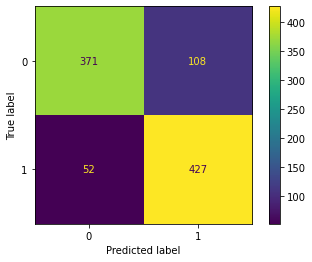

Confusion matrix for the test set
-----------------


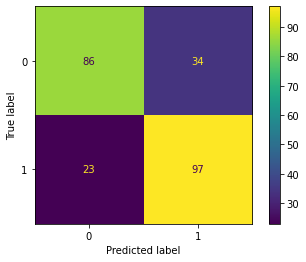

In [105]:
output_rf_bow_raw = text_classification(df["text"], y, CountVectorizer(), rf, cv=10)

### Bag of Words - Lemmas

-----------------
The model score using K-fold cross validation (k=5) is 0.78 with a standard deviation of 0.016
-----------------
The performance metrics of the model


,train,test
error_metric,,
val_mean_score (k=5),0.779783,-
val_std (k=5),0.016191,-
accuracy,0.834029,0.833333
precision,0.810078,0.822581
recall,0.872651,0.85


-----------------
Confusion matrix for the train set
-----------------


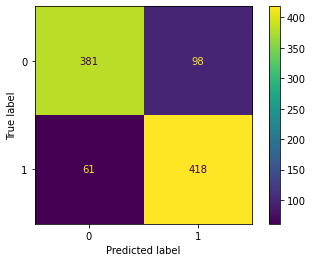

Confusion matrix for the test set
-----------------


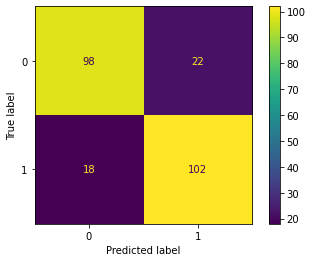

In [106]:
output_rf_bow_lemmas = text_classification(df["lemmas"], y, CountVectorizer(), rf, cv=5)

### Bag of Words - ngrams

-----------------
The model score using K-fold cross validation (k=5) is 0.525 with a standard deviation of 0.014
-----------------
The performance metrics of the model


,train,test
error_metric,,
val_mean_score (k=5),0.525027,-
val_std (k=5),0.013634,-
accuracy,0.557411,0.5625
precision,0.536424,0.539683
recall,0.845511,0.85


-----------------
Confusion matrix for the train set
-----------------


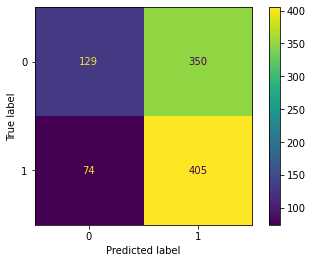

Confusion matrix for the test set
-----------------


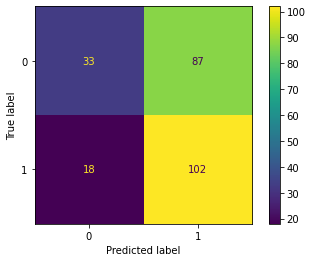

In [107]:
output_rf_bow_ngrams = text_classification(df["ngrams"], y, CountVectorizer(), rf, cv=5)

### TF_IDF - Lemmas

-----------------
The model score using K-fold cross validation (k=5) is 0.764 with a standard deviation of 0.028
-----------------
The performance metrics of the model


,train,test
error_metric,,
val_mean_score (k=5),0.764158,-
val_std (k=5),0.027547,-
accuracy,0.850731,0.804167
precision,0.832016,0.796748
recall,0.878914,0.816667


-----------------
Confusion matrix for the train set
-----------------


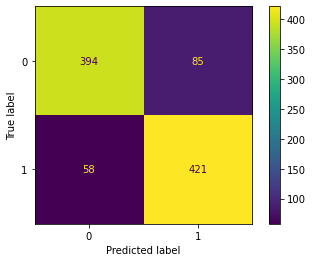

Confusion matrix for the test set
-----------------


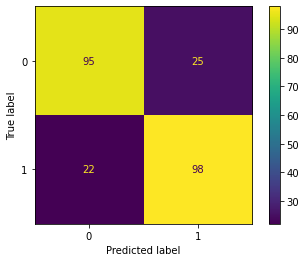

In [108]:
output_rf_tfidf_lemmas = text_classification(df["lemmas"], y, TfidfVectorizer(), rf, cv=5)

## SVM

In [109]:
svm = LinearSVC(random_state=0, tol=1e-2, max_iter=5000)

### Bag of Words - Lemmas

-----------------
The model score using K-fold cross validation (k=5) is 0.803 with a standard deviation of 0.016
-----------------
The performance metrics of the model


,train,test
error_metric,,
val_mean_score (k=5),0.802743,-
val_std (k=5),0.015603,-
accuracy,0.995825,0.816667
precision,1.000000,0.801587
recall,0.991649,0.841667


-----------------
Confusion matrix for the train set
-----------------


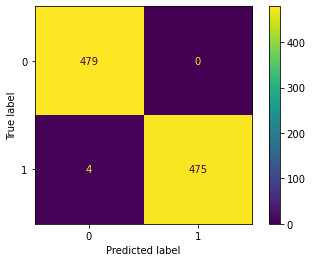

Confusion matrix for the test set
-----------------


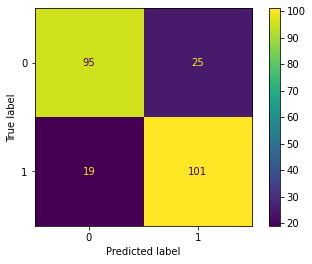

In [110]:
output_svm_bow_lemmas = text_classification(df["lemmas"], y, CountVectorizer(), svm, cv=5)

### Bag of Words - ngrams

-----------------
The model score using K-fold cross validation (k=5) is 0.524 with a standard deviation of 0.01
-----------------
The performance metrics of the model


,train,test
error_metric,,
val_mean_score (k=5),0.523991,-
val_std (k=5),0.009773,-
accuracy,0.839248,0.504167
precision,0.973761,0.517241
recall,0.697286,0.125


-----------------
Confusion matrix for the train set
-----------------


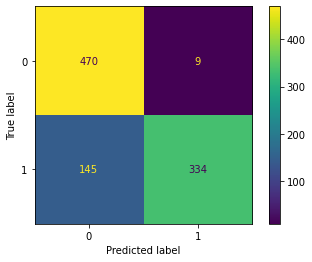

Confusion matrix for the test set
-----------------


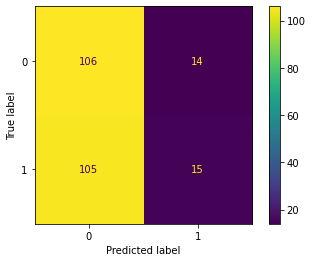

In [111]:
output_svm_bow_ngrams = text_classification(df["ngrams"], y, CountVectorizer(), svm, cv=5)

### TF_ITF - lemmas

-----------------
The model score using K-fold cross validation (k=5) is 0.812 with a standard deviation of 0.023
-----------------
The performance metrics of the model


,train,test
error_metric,,
val_mean_score (k=5),0.812162,-
val_std (k=5),0.023153,-
accuracy,0.986430,0.833333
precision,0.995745,0.807692
recall,0.977035,0.875


-----------------
Confusion matrix for the train set
-----------------


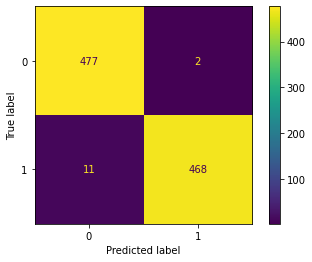

Confusion matrix for the test set
-----------------


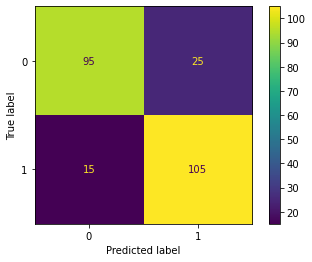

In [112]:
output_svm_tfif_lemmas = text_classification(df["lemmas"], y, TfidfVectorizer(), svm, cv=5)

## Naive Bayes

In [113]:
nb = MultinomialNB()

### Bag of Words - Lemmas

-----------------
The model score using K-fold cross validation (k=5) is 0.791 with a standard deviation of 0.009
-----------------
The performance metrics of the model


,train,test
error_metric,,
val_mean_score (k=5),0.791241,-
val_std (k=5),0.009116,-
accuracy,0.920668,0.808333
precision,0.987893,0.855769
recall,0.851775,0.741667


-----------------
Confusion matrix for the train set
-----------------


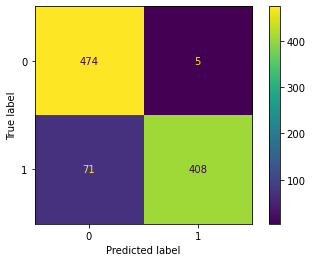

Confusion matrix for the test set
-----------------


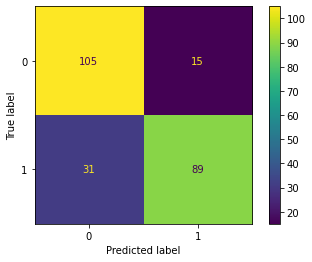

In [114]:
output_nb_bow_lemmas = text_classification(df["lemmas"], y, CountVectorizer(), nb, cv=5)

### Bag of Words - ngrams

-----------------
The model score using K-fold cross validation (k=5) is 0.517 with a standard deviation of 0.029
-----------------
The performance metrics of the model


,train,test
error_metric,,
val_mean_score (k=5),0.516656,-
val_std (k=5),0.029304,-
accuracy,0.816284,0.5
precision,0.974922,0.5
recall,0.649269,0.1


-----------------
Confusion matrix for the train set
-----------------


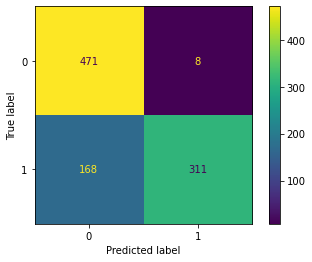

Confusion matrix for the test set
-----------------


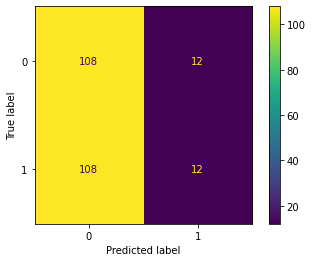

In [115]:
output_nb_bow_ngrams = text_classification(df["ngrams"], y, CountVectorizer(), nb, cv=5)

### TF_ITF - lemmas

-----------------
The model score using K-fold cross validation (k=5) is 0.805 with a standard deviation of 0.015
-----------------
The performance metrics of the model


,train,test
error_metric,,
val_mean_score (k=5),0.804777,-
val_std (k=5),0.014553,-
accuracy,0.932150,0.829167
precision,0.985915,0.869159
recall,0.876827,0.775


-----------------
Confusion matrix for the train set
-----------------


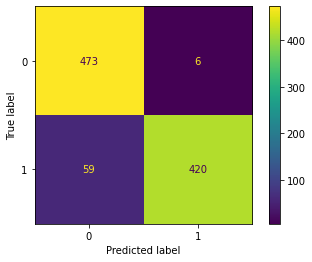

Confusion matrix for the test set
-----------------


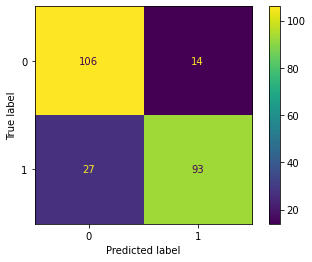

In [116]:
output_nb_tfif_lemmas = text_classification(df["lemmas"], y, TfidfVectorizer(), nb, cv=5)

# Final Model - Naive Bayes with Bag of Words and lemmas

-----------------
The model score using K-fold cross validation (k=5) is 0.791 with a standard deviation of 0.009
-----------------
The performance metrics of the model


,train,test
error_metric,,
val_mean_score (k=5),0.791241,-
val_std (k=5),0.009116,-
accuracy,0.920668,0.808333
precision,0.987893,0.855769
recall,0.851775,0.741667


-----------------
Confusion matrix for the train set
-----------------


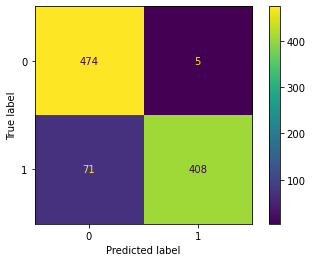

Confusion matrix for the test set
-----------------


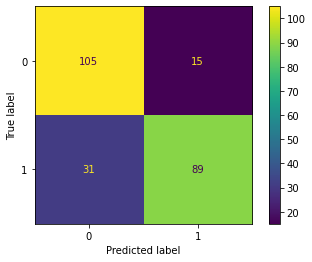

In [117]:
nb = MultinomialNB()
output_nb_bow_lemmas = text_classification(df["lemmas"], y, CountVectorizer(), nb, cv=5)

In [118]:
output_nb_bow_lemmas.keys()

dict_keys(['model', 'val_scores', 'prediction_results', 'performance_metrics'])

In [119]:
output_nb_bow_lemmas["prediction_results"]

,train,test
y,"[0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, ..."
y_pred,"[0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, ...","[0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, ..."


In [120]:
y_pred_test = output_nb_bow_lemmas["prediction_results"].loc["y_pred", "test"]

In [121]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.49      0.55      0.52       120
           1       0.48      0.42      0.45       120

    accuracy                           0.48       240
   macro avg       0.48      0.48      0.48       240
weighted avg       0.48      0.48      0.48       240

